# Primera entrega del proyecto: Propuesta inicial

## Caso: Atención hospitalaria de pacientes con COVID-19. ¿Se pueden agrupar los pacientes según sus características de ingreso?


Se disponen de datos de pacientes hospitalizados por COVID-19 de cuatro clínicas en ciudades diferentes de Colombia. Las variables incluyen aspectos demográficos, síntomas al ingreso, variables de examen físico, algunas clasificaciones clínicas y desenlaces (ingreso a unidad de cuidados intensivos-UCI y muerte). Esta base de datos ha sido previamente usada por nuestro grupo de trabajo para la realización de modelos supervisados, en los que buscábamos predecir el ingreso a UCI. 

En el presente trabajo, consideramos que es oportuno retomar estos datos y aplicarlos en el contexto de aprendizaje no supervisado con el fin de aplicar técnicas de reducción de la dimensionalidad y además nos interesaría poder encontrar grupos de pacientes con características particulares que ingresan a hospitalización. Esto podría tener aplicabilidad al momento de la atención inicial, ya que dependiendo de las características de los pacientes de cada grupo se podría ajustar el tipo de tratamiento brindado.    

Los potenciales interesados en este tipo de análisis son múltiples, incluyendo:

* Clínicas, hospitales y demás instituciones prestadoras de servicios de salud, tanto del sector público como privado.
* Entidades administradoras de planes de beneficios en salud
* Consorcios de IPS's
* Médicos, enfermeras y demás profesionales de la salud
* Pacientes
* Comunidad en general

Muchos de los cuales pueden ser clientes directos interesados en aplicar este tipo de procesamiento y análisis en sus instituciones. En el caso particular de los datos empleados en este proyecto, su fuente consiste en cuatro clínicas privadas del país. La información se obtuvo con su respectivo aval institucional y contó además con el aval de un comité de ética en investigación.  





**Equipo de trabajo:**

El equipo de trabajo está compuesto por cuatro personas, con diversos perfiles académicos y profesionales. Se cuenta con dos personas profesionales en administración de empresas y un profesional en ingeniería industrial, con experiencia en el análisis y la utilización de datos para la toma de decisiones en áreas de producción, administración, laboral y la banca. Además, un médico con experiencia en epidemiología e investigación. Algunas de las labores serán lideradas por cada uno de nosotros según se perfil, pero en general todos estaremos inmersos en el proceso de preparación, transformación y análisis de los datos, así como en la creación de los modelos de aprendizaje no supervisado. 


**Librerias**

In [2]:
# Importar paquetes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest , RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### 2. Exploración de los datos

**Importar Datos**

In [3]:
base = pd.read_excel("BD_Morbimortalidad-COVID-19.xlsx", sheet_name="covid")
base

Hombre  Edad (años) Lugar de atención  Nivel educativo Afiliación SGSSS  \
0         1           52           Pereira  Sin informacion     Contributivo   
1         0           71           Pereira  Sin informacion     Contributivo   
2         0           28           Pereira  Sin informacion     Contributivo   
3         0           40           Pereira      Profesional     Contributivo   
4         1           46           Pereira       Secundaria     Contributivo   
..      ...          ...               ...              ...              ...   
769       0           70            Bogotá  Sin informacion     Contributivo   
770       1           44            Bogotá  Sin informacion     Contributivo   
771       1           47            Bogotá  Sin informacion     Contributivo   
772       1           65            Bogotá  Sin informacion     Contributivo   
773       1           53            Bogotá  Sin informacion       Subsidiado   

     Indice de Charlson  Embarazo_si_no  UCI_si_no  Sintomas_n  Disnea  ...  \
0                     1               0          1           5       1  ...   
1                     3               0          1           3       1  ...   
2                     0               0          0          10       1  ...   
3                     0               0          0           2       0  ...   
4                     0               0          0           7       0  ...   
..                  ...             ...        ...         ...     ...  ...   
769                   3               0          0           6       0  ...   
770                   0               0          0           5       1  ...   
771                   2               0          0           4       0  ...   
772                   3               0          0           2       1  ...   
773                   1               0          1           6       1  ...   

     Hb ingreso  Hto ingreso  Leucocitos ingreso  \
0          14.0         42.2              7870.0   
1           9.5         30.4             14330.0   
2          14.9         45.0              4950.0   
3          11.0         35.7              6490.0   
4          15.4         45.1              6750.0   
..          ...          ...                 ...   
769        13.5         40.4              4860.0   
770        15.2         45.8              4460.0   
771        17.5         50.0              7660.0   
772        16.5         47.2              9680.0   
773        17.1         50.4              3420.0   

     Neutrofilos n absoluto ingreso  Linfocitos n absoluto ingreso  \
0                            7000.0                          500.0   
1                           11300.0                         1200.0   
2                            3100.0                         1600.0   
3                            4100.0                         1900.0   
4                            5400.0                          800.0   
..                              ...                            ...   
769                          3410.0                          870.0   
770                          3350.0                          770.0   
771                          5200.0                         1960.0   
772                          7070.0                         1760.0   
773                          2820.0                          460.0   

     Plaquetas ingreso  Creatinina ingreso  Con_alteraciones_si_no  \
0             144000.0                1.50                       1   
1             424000.0                2.09                       1   
2             145000.0                 NaN                       1   
3             399000.0                0.83                       0   
4             152000.0                1.03                       1   
..                 ...                 ...                     ...   
769           324000.0                0.92                       0   
770           340000.0                0.85                       0   

In [7]:
base.columns

Index(['Hombre', 'Edad (años)', 'Lugar de atención', 'Nivel educativo',
       'Afiliación SGSSS', 'Indice de Charlson', 'Embarazo_si_no', 'UCI_si_no',
       'Sintomas_n', 'Disnea', 'TAM', 'FC ingreso', 'FR ingreso', 'T ingreso',
       'Sat02 ingreso', 'Conciencia_alterada', 'CURB-65_calculado',
       'Score News2_calculado', 'Oxigeno suplementario',
       'Posición del paciente en prono', 'Complicaciones_n',
       'Complicaciones_si_no', 'Hb ingreso', 'Hto ingreso',
       'Leucocitos ingreso', 'Neutrofilos n absoluto ingreso',
       'Linfocitos n absoluto ingreso', 'Plaquetas ingreso',
       'Creatinina ingreso', 'Con_alteraciones_si_no', 'Ingreso a UCI',
       'Muerto_si_no'],
      dtype='object')

In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hombre                          774 non-null    int64  
 1   Edad (años)                     774 non-null    int64  
 2   Lugar de atención               774 non-null    object 
 3   Nivel educativo                 774 non-null    object 
 4   Afiliación SGSSS                774 non-null    object 
 5   Indice de Charlson              774 non-null    int64  
 6   Embarazo_si_no                  774 non-null    int64  
 7   UCI_si_no                       774 non-null    int64  
 8   Sintomas_n                      774 non-null    int64  
 9   Disnea                          774 non-null    int64  
 10  TAM                             749 non-null    float64
 11  FC ingreso                      752 non-null    float64
 12  FR ingreso                      750 

**Verificando resumen de estadísticos**

In [13]:
base.describe().T

count           mean            std       min  \
Hombre                          774.0       0.614987       0.486913      0.00   
Edad (años)                     774.0      56.891473      16.673521     19.00   
Indice de Charlson              774.0       2.042636       2.018541      0.00   
Embarazo_si_no                  774.0       0.018088       0.133355      0.00   
UCI_si_no                       774.0       0.326873       0.469374      0.00   
Sintomas_n                      774.0       4.099483       1.701282      1.00   
Disnea                          774.0       0.675711       0.468411      0.00   
TAM                             749.0      93.367601      14.060333     50.00   
FC ingreso                      752.0      93.764628      18.413917     28.00   
FR ingreso                      750.0      21.728000       5.024973     14.00   
T ingreso                       741.0      36.666127       0.780627     34.70   
Sat02 ingreso                   751.0      87.281625       9.419461     25.00   
Conciencia_alterada             774.0       0.041344       0.199213      0.00   
CURB-65_calculado               774.0       0.868217       0.966822      0.00   
Score News2_calculado           774.0       6.248062       2.918109      0.00   
Oxigeno suplementario           774.0       0.869509       0.337061      0.00   
Posición del paciente en prono  774.0       0.266150       0.442229      0.00   
Complicaciones_n                774.0       2.087855       2.641598      0.00   
Complicaciones_si_no            774.0       0.687339       0.463877      0.00   
Hb ingreso                      694.0      14.212046       2.147976      3.20   
Hto ingreso                     694.0      42.310519       6.257947     12.00   
Leucocitos ingreso              695.0    9711.512230    4850.203971   1520.00   
Neutrofilos n absoluto ingreso  677.0    7788.391433    4568.140660   1150.00   
Linfocitos n absoluto ingreso   665.0    1129.553383     631.215604    100.00   
Plaquetas ingreso               694.0  259831.123919  106261.043074  21000.00   
Creatinina ingreso              623.0       1.282697       1.566381      0.41   
Con_alteraciones_si_no          774.0       0.505168       0.500297      0.00   
Ingreso a UCI                   774.0       0.326873       0.469374      0.00   
Muerto_si_no                    774.0       0.262274       0.440155      0.00   

                                          25%            50%            75%  \
Hombre                               0.000000       1.000000       1.000000   
Edad (años)                         45.000000      57.000000      68.000000   
Indice de Charlson                   0.000000       2.000000       3.000000   
Embarazo_si_no                       0.000000       0.000000       0.000000   
UCI_si_no                            0.000000       0.000000       1.000000   
Sintomas_n                           3.000000       4.000000       5.000000   
Disnea                               0.000000       1.000000       1.000000   
TAM                                 84.333333      93.333333     101.333333   
FC ingreso                          80.000000      91.000000     108.000000   
FR ingreso                          18.000000      20.000000      24.000000   
T ingreso                           36.000000      36.500000      37.000000   
Sat02 ingreso                       84.000000      90.000000      94.000000   
Conciencia_alterada                  0.000000       0.000000       0.000000   
CURB-65_calculado                    0.000000       1.000000       1.000000   
Score News2_calculado                5.000000       6.000000       8.000000   
Oxigeno suplementario                1.000000       1.000000       1.000000   
Posición del paciente en prono       0.000000       0.000000       1.000000   
Complicaciones_n                     0.000000       1.000000       3.000000   
Complicaciones_si_no                 0.000000       1.000000       1.000000   
Hb ingreso           

In [17]:
#Solo variables cuantitativas
base.describe(exclude=['object']).T

count           mean            std       min  \
Hombre                          774.0       0.614987       0.486913      0.00   
Edad (años)                     774.0      56.891473      16.673521     19.00   
Indice de Charlson              774.0       2.042636       2.018541      0.00   
Embarazo_si_no                  774.0       0.018088       0.133355      0.00   
UCI_si_no                       774.0       0.326873       0.469374      0.00   
Sintomas_n                      774.0       4.099483       1.701282      1.00   
Disnea                          774.0       0.675711       0.468411      0.00   
TAM                             749.0      93.367601      14.060333     50.00   
FC ingreso                      752.0      93.764628      18.413917     28.00   
FR ingreso                      750.0      21.728000       5.024973     14.00   
T ingreso                       741.0      36.666127       0.780627     34.70   
Sat02 ingreso                   751.0      87.281625       9.419461     25.00   
Conciencia_alterada             774.0       0.041344       0.199213      0.00   
CURB-65_calculado               774.0       0.868217       0.966822      0.00   
Score News2_calculado           774.0       6.248062       2.918109      0.00   
Oxigeno suplementario           774.0       0.869509       0.337061      0.00   
Posición del paciente en prono  774.0       0.266150       0.442229      0.00   
Complicaciones_n                774.0       2.087855       2.641598      0.00   
Complicaciones_si_no            774.0       0.687339       0.463877      0.00   
Hb ingreso                      694.0      14.212046       2.147976      3.20   
Hto ingreso                     694.0      42.310519       6.257947     12.00   
Leucocitos ingreso              695.0    9711.512230    4850.203971   1520.00   
Neutrofilos n absoluto ingreso  677.0    7788.391433    4568.140660   1150.00   
Linfocitos n absoluto ingreso   665.0    1129.553383     631.215604    100.00   
Plaquetas ingreso               694.0  259831.123919  106261.043074  21000.00   
Creatinina ingreso              623.0       1.282697       1.566381      0.41   
Con_alteraciones_si_no          774.0       0.505168       0.500297      0.00   
Ingreso a UCI                   774.0       0.326873       0.469374      0.00   
Muerto_si_no                    774.0       0.262274       0.440155      0.00   

                                          25%            50%            75%  \
Hombre                               0.000000       1.000000       1.000000   
Edad (años)                         45.000000      57.000000      68.000000   
Indice de Charlson                   0.000000       2.000000       3.000000   
Embarazo_si_no                       0.000000       0.000000       0.000000   
UCI_si_no                            0.000000       0.000000       1.000000   
Sintomas_n                           3.000000       4.000000       5.000000   
Disnea                               0.000000       1.000000       1.000000   
TAM                                 84.333333      93.333333     101.333333   
FC ingreso                          80.000000      91.000000     108.000000   
FR ingreso                          18.000000      20.000000      24.000000   
T ingreso                           36.000000      36.500000      37.000000   
Sat02 ingreso                       84.000000      90.000000      94.000000   
Conciencia_alterada                  0.000000       0.000000       0.000000   
CURB-65_calculado                    0.000000       1.000000       1.000000   
Score News2_calculado                5.000000       6.000000       8.000000   
Oxigeno suplementario                1.000000       1.000000       1.000000   
Posición del paciente en prono       0.000000       0.000000       1.000000   
Complicaciones_n                     0.000000       1.000000       3.000000   
Complicaciones_si_no                 0.000000       1.000000       1.000000   
Hb ingreso           

**Verificando si hay datos nullos**

In [5]:
print(base.isnull().any()) 

Hombre                            False
Edad (años)                       False
Lugar de atención                 False
Nivel educativo                   False
Afiliación SGSSS                  False
Indice de Charlson                False
Embarazo_si_no                    False
UCI_si_no                         False
Sintomas_n                        False
Disnea                            False
TAM                                True
FC ingreso                         True
FR ingreso                         True
T ingreso                          True
Sat02 ingreso                      True
Conciencia_alterada               False
CURB-65_calculado                 False
Score News2_calculado             False
Oxigeno suplementario             False
Posición del paciente en prono    False
Complicaciones_n                  False
Complicaciones_si_no              False
Hb ingreso                         True
Hto ingreso                        True
Leucocitos ingreso                 True


Hay 12 variables con datos faltantes

In [7]:
#Verificando cantidad y porcentaje de nulos en los predictores
def tablanull(df):
    Nvalues = pd.DataFrame(df.isnull().sum())
    Nvalues[1] = round((Nvalues[0]/len(df)*100),2)
    Nvalues.columns = ['Nulos Totales','Porcentaje de Nulos']
    Nvalues = Nvalues[Nvalues['Nulos Totales'] > 0] # filter out rows with zero null values
    Nvalues = Nvalues.sort_values(by='Porcentaje de Nulos', ascending=False)
    return Nvalues
tablanull(base)

Nulos Totales  Porcentaje de Nulos
Creatinina ingreso                        151                19.51
Linfocitos n absoluto ingreso             109                14.08
Neutrofilos n absoluto ingreso             97                12.53
Hb ingreso                                 80                10.34
Hto ingreso                                80                10.34
Plaquetas ingreso                          80                10.34
Leucocitos ingreso                         79                10.21
T ingreso                                  33                 4.26
TAM                                        25                 3.23
FR ingreso                                 24                 3.10
Sat02 ingreso                              23                 2.97
FC ingreso                                 22                 2.84

### Variables categóricas

In [9]:
base_cat = base.select_dtypes(exclude=['int', 'float']) #seleccionamos solo las variables categóricas para ver sus frecuencias
for col in base_cat.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cat[col].unique()) # categorías únicas dentro de cada variable
    print(base_cat[col].value_counts())
    print("Valores perdidos:", base_cat[col].isnull().sum()) #verificamos perdidos x v/ble


Lugar de atención

['Pereira' 'Bogotá' 'Cali' 'Popayan']
Bogotá     304
Cali       302
Pereira     96
Popayan     72
Name: Lugar de atención, dtype: int64
Valores perdidos: 0

Nivel educativo

['Sin informacion' 'Profesional' 'Secundaria' 'Primaria' 'Tecnico'
 'Postgrado' 'secundaria ' 'secundaria' 'primaria']
Sin informacion    604
Secundaria          41
Profesional         39
Primaria            35
Tecnico             27
secundaria          20
secundaria           4
Postgrado            2
primaria             2
Name: Nivel educativo, dtype: int64
Valores perdidos: 0

Afiliación SGSSS

['Contributivo' 'Otro' 'Subsidiado' 'Sin información']
Contributivo       670
Subsidiado          92
Otro                11
Sin información      1
Name: Afiliación SGSSS, dtype: int64
Valores perdidos: 0


### Variables dicotómicas y cuantitativas 

In [11]:
base_cont = base.select_dtypes(include=['int', 'float']) #seleccionamos solo las variables numéricas
for col in base_cont.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cont[col].value_counts())
    print("Valores perdidos:", base_cont[col].isnull().sum()) #verificamos perdidos x v/ble


Hombre

1    476
0    298
Name: Hombre, dtype: int64
Valores perdidos: 0

Edad (años)

54    26
60    24
53    23
56    23
65    22
      ..
94     2
88     2
22     2
21     2
95     1
Name: Edad (años), Length: 77, dtype: int64
Valores perdidos: 0

Indice de Charlson

0     211
1     168
2     131
3     104
4      62
5      49
6      25
8      12
7       7
11      2
10      2
9       1
Name: Indice de Charlson, dtype: int64
Valores perdidos: 0

Embarazo_si_no

0    760
1     14
Name: Embarazo_si_no, dtype: int64
Valores perdidos: 0

UCI_si_no

0    521
1    253
Name: UCI_si_no, dtype: int64
Valores perdidos: 0

Sintomas_n

4     167
3     159
5     154
2     107
6      76
7      53
1      36
8      18
9       3
10      1
Name: Sintomas_n, dtype: int64
Valores perdidos: 0

Disnea

1    523
0    251
Name: Disnea, dtype: int64
Valores perdidos: 0

TAM

96.666667     27
93.333333     25
83.333333     24
86.666667     23
90.000000     23
              ..
144.000000     1
114.666667     1

### Análisis de correlaciones

Matriz de correlación


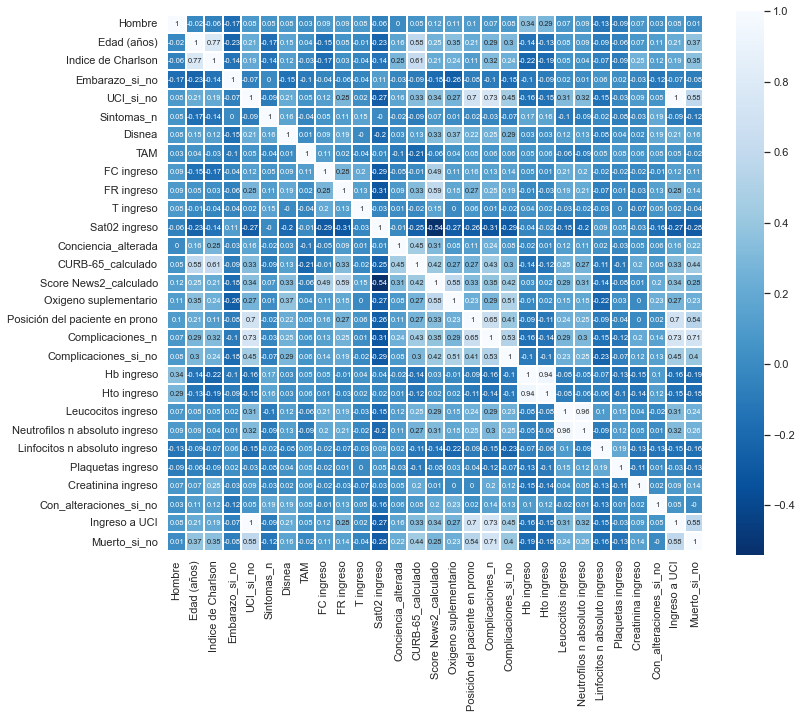

In [8]:
# Verificamos la correlación de la variables.
print('Matriz de correlación')
matriz = pd.DataFrame(base).corr(method='pearson').round(2)

sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(matriz, annot=True, annot_kws={'size': 7.5}, square=True, linewidths=0.1, linecolor="white", cmap="Blues_r")

plt.show()

In [17]:
sns.reset_orig()

**Histogramas de variables numéricas**

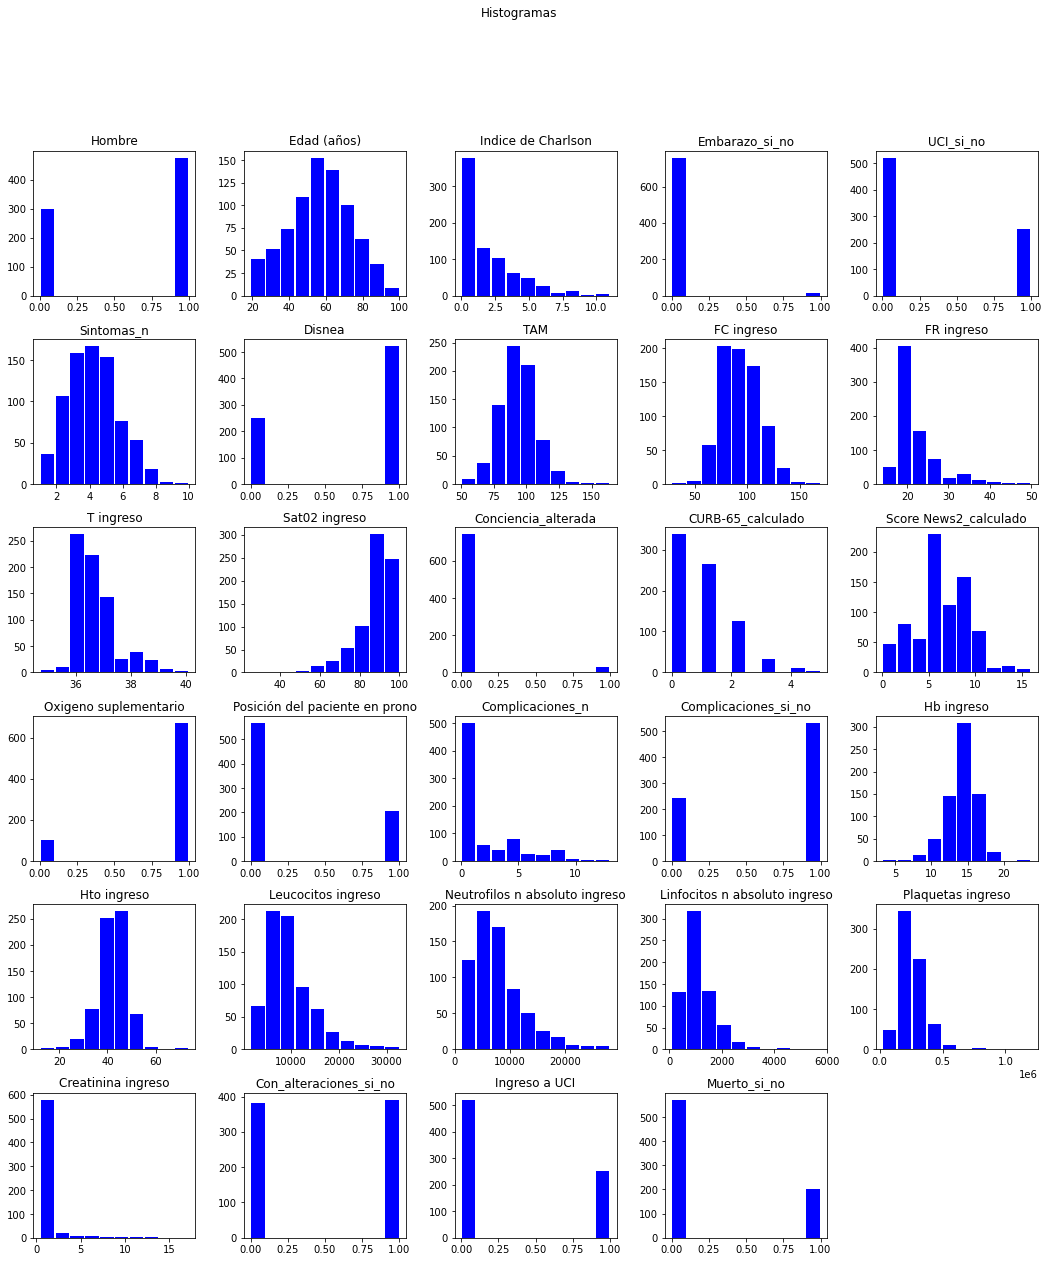

In [18]:
base.hist(figsize=(18, 20),grid=False, color='blue',rwidth = 0.90)
plt.suptitle('Histogramas')
plt.show()

**Histogramas de variables categóricas**

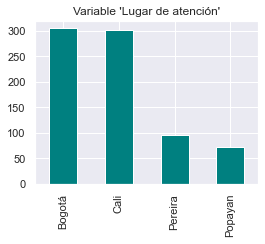

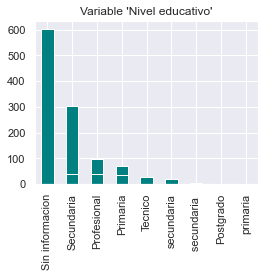

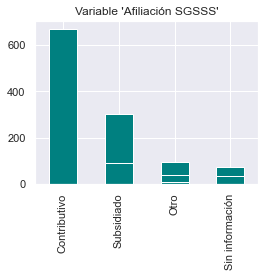

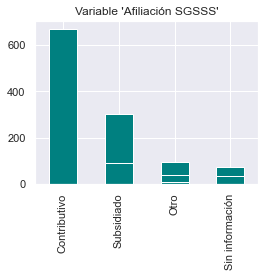

In [10]:
figsize = (4,3)
variables = ['Lugar de atención', 'Nivel educativo', 'Afiliación SGSSS']
for variable in variables:
    ax = base[variable].value_counts().plot.bar(title=f"Variable '{variable}'", color='teal', figsize=figsize)
    display(ax.figure);

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hombre                          774 non-null    int64  
 1   Edad (años)                     774 non-null    int64  
 2   Lugar de atención               774 non-null    object 
 3   Nivel educativo                 774 non-null    object 
 4   Afiliación SGSSS                774 non-null    object 
 5   Indice de Charlson              774 non-null    int64  
 6   Embarazo_si_no                  774 non-null    int64  
 7   UCI_si_no                       774 non-null    int64  
 8   Sintomas_n                      774 non-null    int64  
 9   Disnea                          774 non-null    int64  
 10  TAM                             749 non-null    float64
 11  FC ingreso                      752 non-null    float64
 12  FR ingreso                      750 

**Pairplot de variable desenlace 'Muerto_si_no' y su relación con variables númericas**

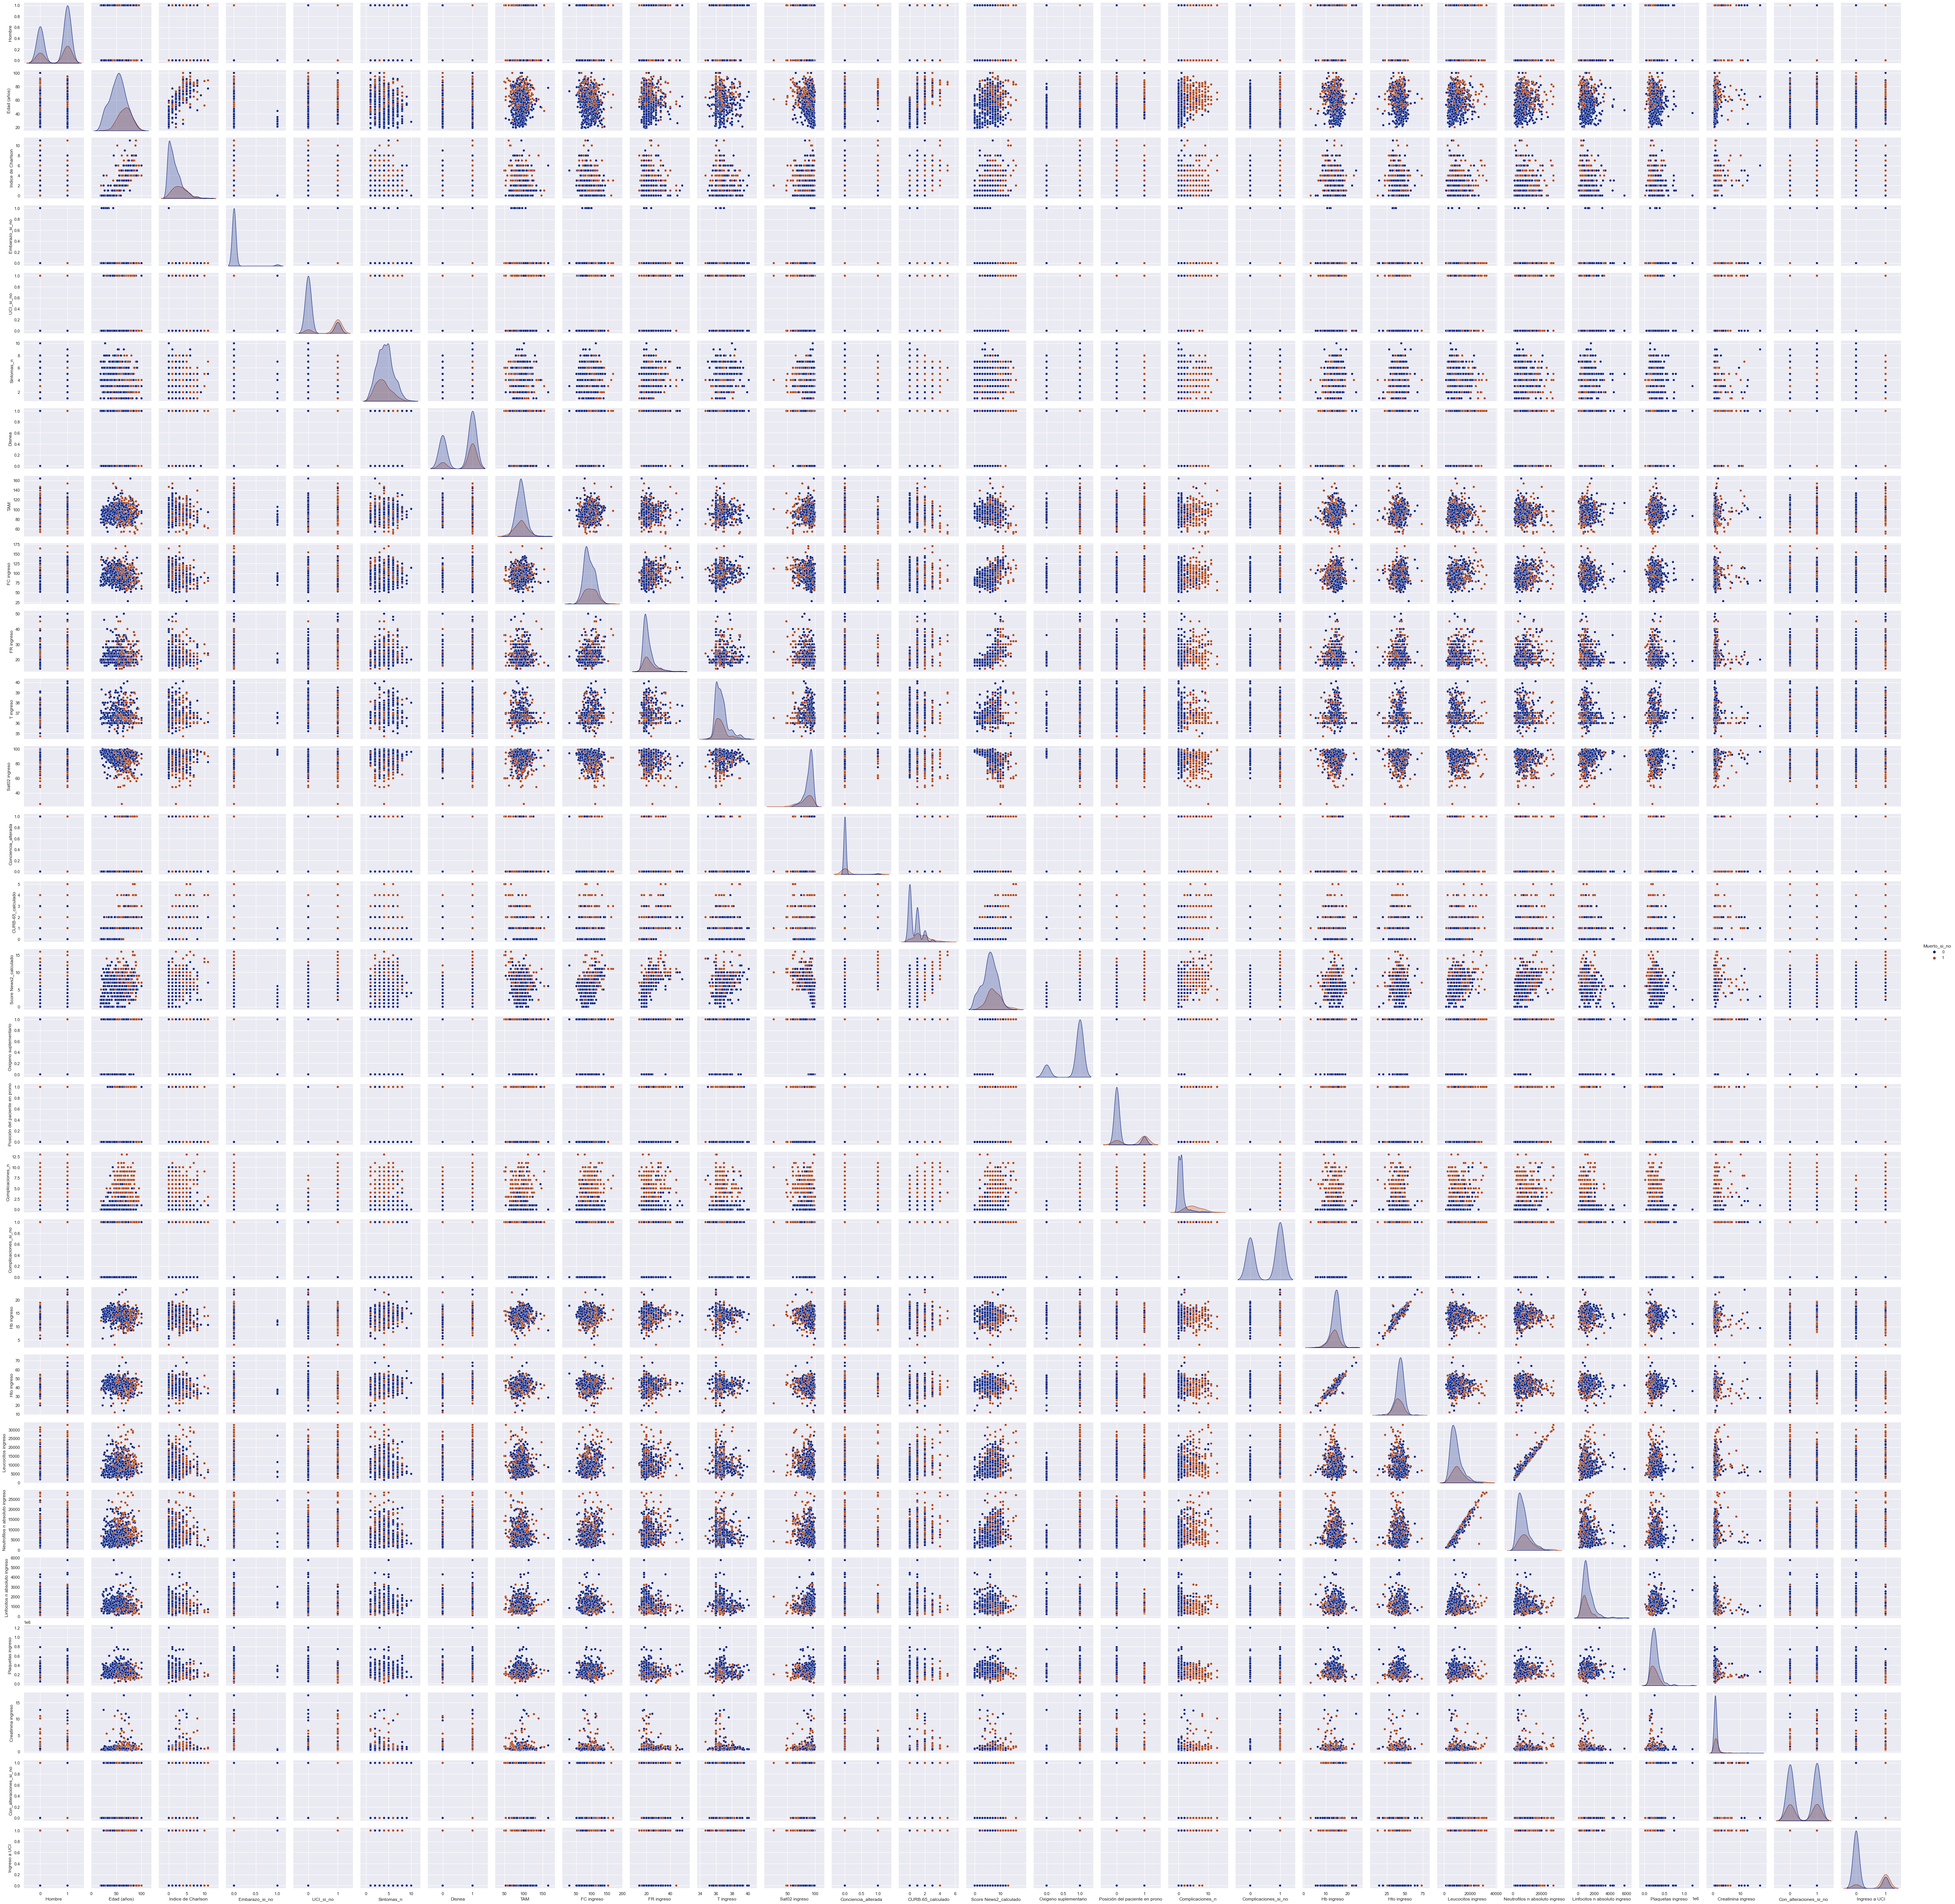

In [13]:
cat_bin = ["Lugar de atención", "Nivel educativo", "Afiliación SGSSS"  ]

columnas = [x for x in base.columns if x not in cat_bin]
base_plot = base.reindex(columns = columnas)
sns.set_palette("dark")
sns.pairplot(base_plot, hue = 'Muerto_si_no')


**Conclusiones sobre variables**

- Las variables Hb ingreso, Leucocitos ingreso, Neutrofilos n absoluto ingreso, Linfocitos n absoluto ingreso, Plaquetas ingreso y Creatinina ingreso, tienen más del 10% de datos perdidos
- El índice de Charlson presenta alta correlación con la edad, dado que esta variable se incluye en el cálculo de dicho índice. Algo similar ocurre con el puntaje del CURB-65 (los pacientes de 65 años o más tienen más riesgo de desenlaces adversos por neumonía)
- La variable UCI_si_no e Ingreso a UCI son fundamentalmenta las mismas, se debe eliminar una. 
- La variable de hemoglobina (Hb) al ingreso se correlaciona con Hematocrito (Hto) al ingreso. En términos prácticos miden aspectos muy similares de la química sanguínea, se puede eliminar una.
- La variable Leucocitos ingreso se relaciona con neutrófilos y linfocitos al ingreso. Esto se debe a que los leucocitos son un valor dado por la suma de los diferentes glóbulos blancos, siendo los neutrófilos y los linfocitos los principales en cantidad. Se podría trabajar simplemente con los leucocitos al ingreso
- En general las variables presentadas son aquellas que se miden al ingreso del paciente a hospitalización, aunque algunas son de desenlace (las complicaciones, muerte, ingreso a UCI y posición prono), por lo cual no deben ser consideradas para los análisis de clúster. 

### 3. Preparación de los datos

In [19]:
base.columns

Index(['Hombre', 'Edad (años)', 'Lugar de atención', 'Nivel educativo',
       'Afiliación SGSSS', 'Indice de Charlson', 'Embarazo_si_no', 'UCI_si_no',
       'Sintomas_n', 'Disnea', 'TAM', 'FC ingreso', 'FR ingreso', 'T ingreso',
       'Sat02 ingreso', 'Conciencia_alterada', 'CURB-65_calculado',
       'Score News2_calculado', 'Oxigeno suplementario',
       'Posición del paciente en prono', 'Complicaciones_n',
       'Complicaciones_si_no', 'Hb ingreso', 'Hto ingreso',
       'Leucocitos ingreso', 'Neutrofilos n absoluto ingreso',
       'Linfocitos n absoluto ingreso', 'Plaquetas ingreso',
       'Creatinina ingreso', 'Con_alteraciones_si_no', 'Ingreso a UCI',
       'Muerto_si_no'],
      dtype='object')

In [22]:
#seleccionamos la base con las variables finales basado en nuestras previas conclusiones 
dfFINAL = base[base.columns.difference(['UCI_si_no', 'Hto ingreso','Neutrofilos n absoluto ingreso',
                                        'Linfocitos n absoluto ingreso','Complicaciones_si_no',
                                        'Complicaciones_n','Posición del paciente en prono', 'Muerto_si_no' ])]
dfFINAL.head(5)

Afiliación SGSSS  CURB-65_calculado  Con_alteraciones_si_no  \
0     Contributivo                  2                       1   
1     Contributivo                  3                       1   
2     Contributivo                  0                       1   
3     Contributivo                  0                       0   
4     Contributivo                  0                       1   

   Conciencia_alterada  Creatinina ingreso  Disnea  Edad (años)  \
0                    0                1.50       1           52   
1                    0                2.09       1           71   
2                    0                 NaN       1           28   
3                    0                0.83       0           40   
4                    0                1.03       0           46   

   Embarazo_si_no  FC ingreso  FR ingreso  ...  Leucocitos ingreso  \
0               0       100.0        36.0  ...              7870.0   
1               0        84.0        33.0  ...             14330.0   
2               0       114.0        20.0  ...              4950.0   
3               0       106.0        18.0  ...              6490.0   
4               0        80.0        20.0  ...              6750.0   

   Lugar de atención  Nivel educativo  Oxigeno suplementario  \
0            Pereira  Sin informacion                      1   
1            Pereira  Sin informacion                      1   
2            Pereira  Sin informacion                      1   
3            Pereira      Profesional                      0   
4            Pereira       Secundaria                      1   

   Plaquetas ingreso Sat02 ingreso Score News2_calculado  Sintomas_n  \
0           144000.0          82.0                     9           5   
1           424000.0          83.0                     8           3   
2           145000.0          96.0                     4          10   
3           399000.0          95.0                     3           2   
4           152000.0          93.0                     5           7   

   T ingreso         TAM  
0       36.3  108.666667  
1       36.5  112.666667  
2       38.0  101.000000  
3       36.0  113.666667  
4       38.5   93.333333  

[5 rows x 24 columns]

In [23]:
dfFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Afiliación SGSSS        774 non-null    object 
 1   CURB-65_calculado       774 non-null    int64  
 2   Con_alteraciones_si_no  774 non-null    int64  
 3   Conciencia_alterada     774 non-null    int64  
 4   Creatinina ingreso      623 non-null    float64
 5   Disnea                  774 non-null    int64  
 6   Edad (años)             774 non-null    int64  
 7   Embarazo_si_no          774 non-null    int64  
 8   FC ingreso              752 non-null    float64
 9   FR ingreso              750 non-null    float64
 10  Hb ingreso              694 non-null    float64
 11  Hombre                  774 non-null    int64  
 12  Indice de Charlson      774 non-null    int64  
 13  Ingreso a UCI           774 non-null    int64  
 14  Leucocitos ingreso      695 non-null    fl

In [27]:
#Imputación para datos faltantes - Spline interpolation
dfFINAL = dfFINAL.interpolate(method='spline', order=2)

In [28]:
#Comprobando nulos
dfFINAL.isnull().sum().sum()

0

## Transformación a la variable Nivel Educativo

In [29]:
dfFINAL['Nivel educativo'] = dfFINAL['Nivel educativo'].str.strip()

In [30]:
dfFINAL['Nivel educativo'] = dfFINAL['Nivel educativo'].map({'primaria':'Primaria', 'Primaria':'Primaria',
                                                             'secundaria':'Secundaria', 'Secundaria':'Secundaria', 
                                                             'Sin informacion':'Sin informacion', 
                                                             'Profesional':'Profesional',
                                                             'Tecnico':'Tecnico', 
                                                             'Postgrado':'Postgrado',})

In [31]:
dfFINAL['Nivel educativo'].value_counts()

Sin informacion    604
Secundaria          65
Profesional         39
Primaria            37
Tecnico             27
Postgrado            2
Name: Nivel educativo, dtype: int64

In [32]:
#Encoding variables categóricas
le = LabelEncoder()
dfFINAL['Afiliación SGSSS'] = le.fit_transform(dfFINAL['Afiliación SGSSS'])
dfFINAL['Lugar de atención'] = le.fit_transform(dfFINAL['Lugar de atención'])
dfFINAL['Nivel educativo'] = le.fit_transform(dfFINAL['Nivel educativo'])
dfFINAL.head()

Afiliación SGSSS  CURB-65_calculado  Con_alteraciones_si_no  \
0                 0                  2                       1   
1                 0                  3                       1   
2                 0                  0                       1   
3                 0                  0                       0   
4                 0                  0                       1   

   Conciencia_alterada  Creatinina ingreso  Disnea  Edad (años)  \
0                    0            1.500000       1           52   
1                    0            2.090000       1           71   
2                    0            1.563517       1           28   
3                    0            0.830000       0           40   
4                    0            1.030000       0           46   

   Embarazo_si_no  FC ingreso  FR ingreso  ...  Leucocitos ingreso  \
0               0       100.0        36.0  ...              7870.0   
1               0        84.0        33.0  ...             14330.0   
2               0       114.0        20.0  ...              4950.0   
3               0       106.0        18.0  ...              6490.0   
4               0        80.0        20.0  ...              6750.0   

   Lugar de atención  Nivel educativo  Oxigeno suplementario  \
0                  2                4                      1   
1                  2                4                      1   
2                  2                4                      1   
3                  2                2                      0   
4                  2                3                      1   

   Plaquetas ingreso  Sat02 ingreso  Score News2_calculado  Sintomas_n  \
0           144000.0           82.0                      9           5   
1           424000.0           83.0                      8           3   
2           145000.0           96.0                      4          10   
3           399000.0           95.0                      3           2   
4           152000.0           93.0                      5           7   

   T ingreso         TAM  
0       36.3  108.666667  
1       36.5  112.666667  
2       38.0  101.000000  
3       36.0  113.666667  
4       38.5   93.333333  

[5 rows x 24 columns]

In [33]:
dfFINAL['Ingreso a UCI'].value_counts()

0    521
1    253
Name: Ingreso a UCI, dtype: int64